In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("case_study_data.xlsx")
df.head(2)

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2


In [3]:
df.shape

(1000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [5]:
df.isna().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,31.449,18.055564,6.0,18.00,27.0,36.0,108.0
amount,1000.0,4907.134,4234.100176,375.0,2048.25,3479.5,5958.5,27636.0
inst_rate,1000.0,4.606,1.572016,2.0,3.00,5.0,6.0,6.0
residing_since,1000.0,4.407,1.570292,2.0,3.00,5.0,6.0,6.0
age,1000.0,53.566,17.065664,29.0,41.00,50.0,63.0,113.0
num_credits,1000.0,2.441,0.697858,2.0,2.00,2.0,3.0,6.0
dependents,1000.0,2.155,0.362086,2.0,2.00,2.0,2.0,3.0
status,1000.0,1.300,0.458487,1.0,1.00,1.0,2.0,2.0


In [7]:
df.apply(lambda x:x.unique())

checkin_acc                                       [A11, A12, A14, A13]
duration             [9, 72, 18, 63, 36, 54, 45, 23, 14, 15, 11, 90...
credit_history                               [A34, A32, A33, A30, A31]
purpose              [A43, A46, A42, A40, A41, A49, A44, A45, A410,...
amount               [1754, 8927, 3144, 11823, 7305, 13583, 4253, 1...
svaing_acc                                   [A65, A61, A63, A64, A62]
present_emp_since                            [A75, A73, A74, A71, A72]
inst_rate                                                 [6, 3, 5, 2]
personal_status                                   [A93, A92, A91, A94]
other_debtors                                       [A101, A103, A102]
residing_since                                            [6, 3, 5, 2]
property                                      [A121, A122, A124, A123]
age                  [101, 33, 74, 68, 80, 53, 92, 42, 38, 36, 90, ...
inst_plans                                          [A143, A141, A142]
housin

In [8]:
df["status"].value_counts()

1    700
2    300
Name: status, dtype: int64

In [9]:
x=df[df["status"]==1]
x

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
5,A14,54,A32,A46,13583,A65,A73,3,A93,A101,...,A124,53,A143,A153,2,A172,3,A192,A201,1
6,A14,36,A32,A42,4253,A63,A75,5,A93,A101,...,A122,80,A143,A152,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A14,18,A32,A40,3585,A65,A75,6,A93,A101,...,A123,75,A143,A152,2,A173,2,A192,A201,1
995,A14,18,A32,A42,2604,A61,A74,5,A92,A101,...,A121,47,A143,A152,2,A172,2,A191,A201,1
996,A11,45,A32,A41,5786,A61,A73,6,A91,A101,...,A122,60,A143,A152,2,A174,2,A192,A201,1
997,A14,18,A32,A43,1206,A61,A75,6,A93,A101,...,A123,57,A143,A152,2,A173,2,A191,A201,1


In [10]:
df.groupby(["status"]).amount.agg(["max","min","mean"])

,max,min,mean
status,,,
1,23786,375,4478.431429
2,27636,650,5907.440000


In [11]:
df.groupby(["status","duration"]).amount.agg(["max","min","mean"])

max    min          mean
status duration                            
1      6          5070    902   2494.500000
       8          5172   5172   5172.000000
       9         10142    375   2100.515152
       11         3864   1095   2669.000000
       12         5097   1097   2093.666667
       14         5748    414   2669.714286
       15        10962   1091   2888.200000
       17        10842   1731   4572.111111
       18        11208    509   2720.592308
       20         3152   1323   2321.250000
       21         5960   1203   3092.666667
       23         7986    588   3248.096154
       24         1763   1763   1763.000000
       27        12707    944   4158.098592
       30        10586   3318   6915.428571
       32         7872    857   4198.333333
       33         4013   1925   2969.000000
       36        13916   1076   4808.000000
       39        11949  11949  11949.000000
       41        12920   3663   7087.125000
       42        11736   4115   7925.500000
       45        15935   2573   6492.629630
       50        10880   4146   7513.000000
       54        23786   1364   8302.695652
       59        21269   3854  13911.250000
       63        13925   5091   9151.250000
       68         6864   6864   6864.000000
       71        16083  16083  16083.000000
       72        19124   4127  10756.350000
       81        14154  14154  14154.000000
       90        23480   9791  15647.571429
2      9         22344    650   6944.444444
       12         1856   1856   1856.000000
       14         7694    981   2328.642857
       15         3315   1860   2379.666667
       18        11798    914   2577.510204
       21        13467  13467  13467.000000
       23        10275   1203   3655.500000
       24         3938   3938   3938.000000
       27        19464    650   3941.880952
       30         3353   3353   3353.000000
       32        19020   1782   5572.444444
       36        18869   1373   4997.321429
       41        12477   3780   6785.000000
       42         6009   6009   6009.000000
       45        17997   2862   7259.461538
       50         6422   6422   6422.000000
       54        21477   2729   9020.216216
       59         7400   7400   7400.000000
       60         8997   8997   8997.000000
       63        10761   5948   7754.666667
       68        17724   2768   8039.500000
       72        27636   4577  11360.285714
       81        23918  23918  23918.000000
       90        22173   9432  14159.666667
       108        8393   8393   8393.000000

In [12]:
df["num_credits"].unique()

array([3, 2, 5, 6], dtype=int64)

In [13]:
df.corr()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
duration,1.000000,0.625128,0.066263,0.024970,-0.037106,-0.026296,-0.024283,0.214668
amount,0.625128,1.000000,-0.272906,0.018909,0.032873,0.016287,0.017143,0.154739
inst_rate,0.066263,-0.272906,1.000000,0.047184,0.056342,0.007988,-0.066704,0.071108
residing_since,0.024970,0.018909,0.047184,1.000000,0.268296,0.102776,0.045624,-0.000139
age,-0.037106,0.032873,0.056342,0.268296,1.000000,0.164017,0.117814,-0.090807
num_credits,-0.026296,0.016287,0.007988,0.102776,0.164017,1.000000,0.117438,-0.044738
dependents,-0.024283,0.017143,-0.066704,0.045624,0.117814,0.117438,1.000000,-0.003015
status,0.214668,0.154739,0.071108,-0.000139,-0.090807,-0.044738,-0.003015,1.000000


<AxesSubplot:>

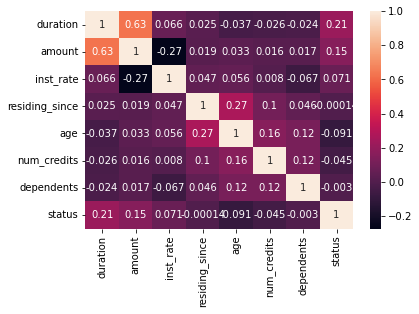

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df_obj=pd.get_dummies(df)
df_obj

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,9,1754,6,6,101,3,2,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,72,8927,3,3,33,2,2,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,18,3144,3,5,74,2,3,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,63,11823,3,6,68,2,3,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,36,7305,5,6,80,3,3,2,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,2604,5,6,47,2,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
996,45,5786,6,6,60,2,2,1,1,0,...,1,0,0,0,0,1,0,1,1,0
997,18,1206,6,6,57,2,2,1,0,0,...,1,0,0,0,1,0,1,0,1,0
998,68,2768,6,6,35,2,2,2,1,0,...,0,1,0,0,1,0,0,1,1,0


In [16]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1000 non-null   int64
 1   amount                 1000 non-null   int64
 2   inst_rate              1000 non-null   int64
 3   residing_since         1000 non-null   int64
 4   age                    1000 non-null   int64
 5   num_credits            1000 non-null   int64
 6   dependents             1000 non-null   int64
 7   status                 1000 non-null   int64
 8   checkin_acc_A11        1000 non-null   uint8
 9   checkin_acc_A12        1000 non-null   uint8
 10  checkin_acc_A13        1000 non-null   uint8
 11  checkin_acc_A14        1000 non-null   uint8
 12  credit_history_A30     1000 non-null   uint8
 13  credit_history_A31     1000 non-null   uint8
 14  credit_history_A32     1000 non-null   uint8
 15  credit_history_A33     1000 non-null   

<AxesSubplot:>

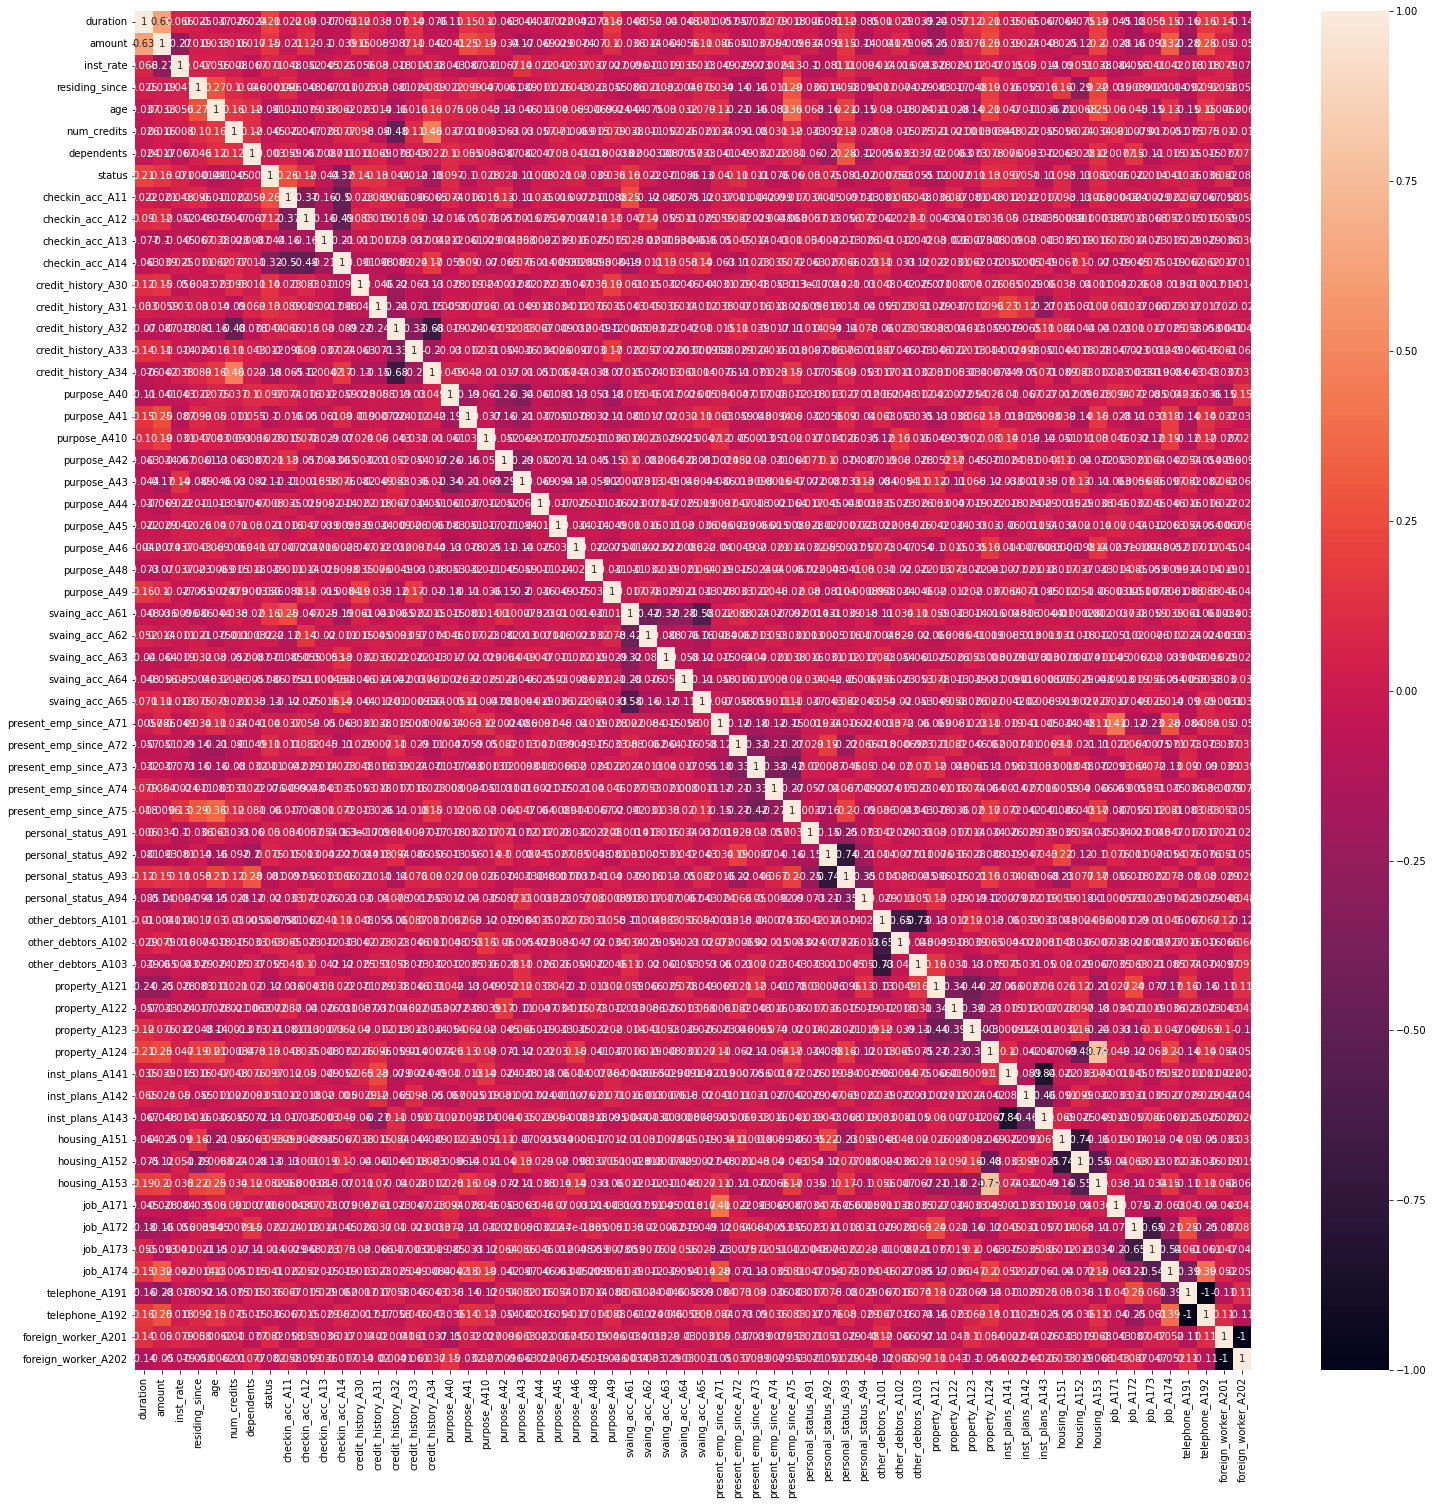

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(df_obj.corr(),annot=True)

In [18]:
df_obj.corr()["status"].sort_values(ascending=False)

status                1.000000
checkin_acc_A11       0.258333
duration              0.214668
svaing_acc_A61        0.161007
amount                0.154739
                        ...   
property_A121        -0.119300
svaing_acc_A65       -0.129238
housing_A152         -0.134589
credit_history_A34   -0.181713
checkin_acc_A14      -0.322436
Name: status, Length: 62, dtype: float64

In [19]:
x=df_obj.drop(columns=["status"])
y=df_obj["status"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=123)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc=DecisionTreeClassifier()

In [24]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred=dtc.predict(x_test)

In [26]:
y_pred

array([2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1], dtype=int64)

In [27]:
from sklearn.metrics import classification_report

In [28]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.74      0.73      0.73        66
           2       0.49      0.50      0.49        34

    accuracy                           0.65       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.65      0.65      0.65       100

